In [1]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import seaborn as sns
from datetime import datetime

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Install File


In [2]:
nameCSV = 'C_B_G_file.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]
len(lat)

2411

## Calculate mean value of each satellite track 

In [3]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2205


## Make ndarray(alltime) and list(days2) that has dates

In [4]:
alltime = num2date(tt[:],u'days since 1985-01-01 00:00:00 UTC')

In [5]:
for k in range(len(days)):
    print wh[days[k]], alltime[k]

2.700812578201294 1985-04-01 07:44:52.125977
2.226555824279785 1985-04-24 09:24:40.746528
1.666750192642212 1985-05-17 11:04:17.078125
2.5757501125335693 1985-05-20 11:13:06.295898
1.2649999856948853 1985-06-26 02:58:29.750487
2.4064617156982417 1985-07-05 14:32:17.463942
1.848000168800354 1985-07-28 16:11:55.262498
2.2143335342407227 1985-07-31 16:20:42.515627
0.5731765031814575 1985-09-15 19:39:47.702207
1.6660001277923584 1985-10-08 21:19:13.951173
1.3996667861938477 1985-10-31 22:58:29.697917
2.231799840927124 1985-11-03 23:07:14.012499
1.0398334264755251 1985-12-10 14:51:42.582031
0.6495000123977661 1985-12-13 15:00:26.898441
0.625 1986-01-02 16:30:52.937502
0.8496250510215759 1986-01-12 04:04:35.771729
2.6090712547302246 1986-01-28 18:18:44.251115
1.4392000436782837 1986-02-04 05:43:40.249478
2.091571569442749 1986-02-27 07:22:40.318080
2.407249927520752 1986-03-02 07:31:23.163085
3.2320001125335693 1986-03-22 09:01:36.468749
2.7468183040618896 1986-03-25 09:10:20.336648
0.926411

2.312375068664551 2005-05-20 23:31:03.911459
2.598599910736084 2005-05-23 03:56:04.428516
2.551300048828125 2005-06-09 05:08:50.955295
4.071857452392578 2005-06-12 12:01:01.366071
1.8122000694274905 2005-06-24 23:31:05.336459
1.397400140762329 2005-06-26 06:21:40.855468
1.368000030517578 2005-07-13 07:34:30.652699
2.1468751430511475 2005-07-17 12:01:03.360938
1.3151999711990356 2005-07-29 23:31:03.167709
1.0991427898406982 2005-07-30 08:47:15.822656
2.235937595367432 2005-08-16 10:00:05.526042
1.2602667808532717 2005-08-21 12:01:00.046874
1.5934443473815918 2005-09-02 11:12:55.718750
1.7325999736785889 2005-09-02 23:30:58.785714
1.3243125677108765 2005-09-08 22:34:41.656247
2.999333620071411 2005-09-19 12:25:43.886718
2.0789999961853027 2005-09-25 12:00:58.504687
0.8021429777145386 2005-10-06 13:38:30.853517
0.4861000180244446 2005-10-07 23:31:00.319792
2.9642000198364262 2005-10-23 14:51:14.759377
1.5908184051513672 2005-10-30 12:01:00.276042
2.669374942779541 2005-11-09 16:04:02.2929

2.144999885559082 2016-05-23 04:58:57.409375
1.15958833694458 2016-05-24 16:45:15.720487
1.3361666997273762 2016-05-28 14:41:36.678573
1.8076190040225075 2016-05-28 14:42:57.151788
0.9045000871022544 2016-06-01 09:12:33.330181
1.7837620689755391 2016-06-01 15:51:01.189063
1.368499994277954 2016-06-06 21:35:00.875001
1.3927620479038785 2016-06-06 21:36:21.643230
0.9718572071620396 2016-06-11 07:11:04.732422
1.6085556877983942 2016-06-11 07:12:25.395313
1.5282942056655884 2016-06-12 11:59:49
1.8383182178844104 2016-06-15 23:31:53
1.3346922947810247 2016-06-16 19:33:32.910716
0.7908235788345337 2016-06-19 00:22:52.025110
1.5210000673929853 2016-06-19 03:36:31.038833
1.1539999643961592 2016-06-21 05:09:36.685547
2.2869499206542967 2016-06-21 05:11:01.085937
0.8037500381469727 2016-06-22 15:20:13.078125
0.8716000239054362 2016-06-26 17:32:04.482143
1.218666632970174 2016-06-26 17:33:25.549478
0.7942353416891659 2016-07-01 03:08:08.419336
2.0899286270141597 2016-07-01 03:09:29.874628
3.36094

In [6]:
days2 = [] #daystart
for k in range(len(alltime)):
       
    t1 = alltime[k]
    if k == 0: #get day 0. Then else: every day after that
        days2.append(alltime[k])
        dd =alltime[k]
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days2.append(alltime[k])
            it += 1
            dd = alltime[k]
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2205


In [7]:
days2

[datetime.datetime(1985, 4, 1, 7, 44, 52, 125977),
 datetime.datetime(1985, 4, 24, 9, 24, 40, 746528),
 datetime.datetime(1985, 5, 17, 11, 4, 17, 78125),
 datetime.datetime(1985, 5, 20, 11, 13, 6, 295898),
 datetime.datetime(1985, 6, 26, 2, 58, 29, 750487),
 datetime.datetime(1985, 7, 5, 14, 32, 17, 463942),
 datetime.datetime(1985, 7, 28, 16, 11, 55, 262498),
 datetime.datetime(1985, 7, 31, 16, 20, 42, 515627),
 datetime.datetime(1985, 9, 15, 19, 39, 47, 702207),
 datetime.datetime(1985, 10, 8, 21, 19, 13, 951173),
 datetime.datetime(1985, 10, 31, 22, 58, 29, 697917),
 datetime.datetime(1985, 11, 3, 23, 7, 14, 12499),
 datetime.datetime(1985, 12, 10, 14, 51, 42, 582031),
 datetime.datetime(1985, 12, 13, 15, 0, 26, 898441),
 datetime.datetime(1986, 1, 2, 16, 30, 52, 937502),
 datetime.datetime(1986, 1, 12, 4, 4, 35, 771729),
 datetime.datetime(1986, 1, 28, 18, 18, 44, 251115),
 datetime.datetime(1986, 2, 4, 5, 43, 40, 249478),
 datetime.datetime(1986, 2, 27, 7, 22, 40, 318080),
 dateti

## WAVE PERIOD EQN

$ \epsilon = 3.25 \left( H_s^2 g^2/U^4 \right)^{0.31}$


In [8]:
def waveage(H, U, grav=9.80665):
    '''
    The pseudo wave age can be expressed in terms of significant wave height and surface wind speed.
    '''

    grav2 = grav**2
    hs2 = np.square(H) 
    u4 = np.power(U,4)
    tmp = np.divide(hs2*grav2,u4)
    eps = 3.25*np.power(tmp,0.31)
    
    return eps


def waveperiod(H, U, grav=9.80665):
    '''
    Wave age from GA-2, Govindan et al.
    '''

    eps = waveage(H, U, grav=9.80665)
    period = (((eps-(5.78))/(eps+(U/(H*((U/H)+H)))))+(H+(5.70)))
    
    return period

In [9]:
T = waveperiod(wh,ws)
print T
print len(T),len(wh)

[6.77643209 6.61147856 6.43733401 ... 5.64967776 5.2767476  5.61217235]
2411 2411


In [10]:
dayswh = wh[days] #wave height for each satellite pass
daysTz = T[days]

print len(dayswh)
print len(daysTz)

2205
2205


## Calculate Wave Power



### Total Wave Energy
$E = \frac{1}{8} \left(pgH_s^2\right) $


In [11]:
def totalwaveenergy(H):
    
    '''
    The total wave energy can be calculated using Hs, gravity and water density
    '''
    
    x = 1./8.
    p = 1025. #sea water density, kg/m^3
    g = 9.80665
    h2 = np.square(H) 
    
    pgh = p*g*h2
    
    e = x*pgh
    
    return e

In [12]:
we = totalwaveenergy(wh)

In [13]:
we

array([9165.23171101, 6229.04876   , 3490.56381269, ..., 4040.70904482,
       2429.3863292 , 2999.24238173])

### Wave energy speed / Wave Velocity
$Cg = \frac{gTz}{2\pi}n$


In [14]:
import math
def wavespeed(T):
    '''
    Wave group speed
    '''
    
    g =9.80665
    ts = T #wave period
    pi = 2*math.pi
    n=0.5
    
    top = g*ts
    
    Cg = n *(np.divide(top,pi))
    
    return Cg
    

In [15]:
Cg = wavespeed(T)
Cg

array([5.28824907, 5.15952125, 5.02362086, ..., 4.40894305, 4.11791267,
       4.37967427])

### Wave Energy Flux
$P = ECg$

In [16]:
def waveenergyflux(H,T):
    '''
    The rate at which energy is carried by waves, determined using total wave energy and wave energy speed
    '''
    
    e = totalwaveenergy(H)
    Cg = wavespeed(T)
    y = 0.001
    P = e * Cg*y
    
    return P
    
    

In [17]:
power1 = waveenergyflux(wh,T)
power1

array([48.46802812, 32.13890944, 17.53526919, ..., 17.81525608,
       10.00400075, 13.13570467])

In [18]:
pp = power1[days]

In [19]:
print pp.shape, power1.shape, 'therefore use pp in df'

(2205,) (2411,) therefore use pp in df


In [20]:
print dayswh.shape
print daysTz.shape

(2205,)
(2205,)


In [21]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "period":daysTz, "power":pp})
df.to_csv("CBG_timeseries.csv", sep=',',index=False)
df

,date,period,power,wh
0,1985-04-01 07:44:52.125977,6.776432,48.468028,2.700813
1,1985-04-24 09:24:40.746528,6.611479,32.138909,2.226556
2,1985-05-17 11:04:17.078125,6.437334,17.535269,1.666750
3,1985-05-20 11:13:06.295898,5.861532,38.131504,2.575750
4,1985-06-26 02:58:29.750487,5.835282,9.156052,1.265000
5,1985-07-05 14:32:17.463942,6.076965,34.507221,2.406462
6,1985-07-28 16:11:55.262498,6.670873,22.338400,1.848000
7,1985-07-31 16:20:42.515627,5.987101,28.785121,2.214334
8,1985-09-15 19:39:47.702207,3.850142,1.240278,0.573177
9,1985-10-08 21:19:13.951173,5.929320,16.136907,1.666000


In [22]:
df99 = pd.DataFrame(data={"date": days2, "wh":dayswh})
df99.to_csv("CBG_wh_long.csv", sep=',',index=False)
df99

,date,wh
0,1985-04-01 07:44:52.125977,2.700813
1,1985-04-24 09:24:40.746528,2.226556
2,1985-05-17 11:04:17.078125,1.666750
3,1985-05-20 11:13:06.295898,2.575750
4,1985-06-26 02:58:29.750487,1.265000
5,1985-07-05 14:32:17.463942,2.406462
6,1985-07-28 16:11:55.262498,1.848000
7,1985-07-31 16:20:42.515627,2.214334
8,1985-09-15 19:39:47.702207,0.573177
9,1985-10-08 21:19:13.951173,1.666000


In [23]:
print len(df.wh)
print len(df.date)
print len(df.power)

2205
2205
2205


## Get rolling average wh based on 30 Days

In [24]:
yrolling = df.rolling('30D', on = 'date', min_periods = 1).mean()

In [25]:
yrolling

,date,period,power,wh
0,1985-04-01 07:44:52.125977,6.776432,48.468028,2.700813
1,1985-04-24 09:24:40.746528,6.693955,40.303469,2.463684
2,1985-05-17 11:04:17.078125,6.524406,24.837089,1.946653
3,1985-05-20 11:13:06.295898,6.303448,29.268561,2.156352
4,1985-06-26 02:58:29.750487,5.835282,9.156052,1.265000
5,1985-07-05 14:32:17.463942,5.956123,21.831636,1.835731
6,1985-07-28 16:11:55.262498,6.373919,28.422811,2.127231
7,1985-07-31 16:20:42.515627,6.244980,28.543581,2.156265
8,1985-09-15 19:39:47.702207,3.850142,1.240278,0.573177
9,1985-10-08 21:19:13.951173,4.889731,8.688592,1.119588


In [26]:
wh_rolling=yrolling['wh']

period_rolling=yrolling['period']

power_rolling = yrolling['power']

## Incorporate rolling average wh into dataframe

In [27]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "wh_rolling":wh_rolling, "period":daysTz, "period_rolling":period_rolling, "power":pp, "power_rolling":power_rolling })
df.to_csv("CBG_timeseries.csv", sep=',',index=False)
df

,date,period,period_rolling,power,power_rolling,wh,wh_rolling
0,1985-04-01 07:44:52.125977,6.776432,6.776432,48.468028,48.468028,2.700813,2.700813
1,1985-04-24 09:24:40.746528,6.611479,6.693955,32.138909,40.303469,2.226556,2.463684
2,1985-05-17 11:04:17.078125,6.437334,6.524406,17.535269,24.837089,1.666750,1.946653
3,1985-05-20 11:13:06.295898,5.861532,6.303448,38.131504,29.268561,2.575750,2.156352
4,1985-06-26 02:58:29.750487,5.835282,5.835282,9.156052,9.156052,1.265000,1.265000
5,1985-07-05 14:32:17.463942,6.076965,5.956123,34.507221,21.831636,2.406462,1.835731
6,1985-07-28 16:11:55.262498,6.670873,6.373919,22.338400,28.422811,1.848000,2.127231
7,1985-07-31 16:20:42.515627,5.987101,6.244980,28.785121,28.543581,2.214334,2.156265
8,1985-09-15 19:39:47.702207,3.850142,3.850142,1.240278,1.240278,0.573177,0.573177
9,1985-10-08 21:19:13.951173,5.929320,4.889731,16.136907,8.688592,1.666000,1.119588


In [28]:
print df.date[38]
print df.date[39]

1988-07-24 10:47:28.773437
1992-10-16 17:50:42.914062


In [29]:
#Period normal    
time1 = df.period[0:38]
time2 = df.period[39:-1]

#Period rolling
tt1 = df.period_rolling[0:38]
tt2 = df.period_rolling[39:-1]
        


#Hs normal
y1 = df.wh[0:38]
y2 = df.wh[39:-1]

#Hs rolling
yy1 = df.wh_rolling[0:38]
yy2 = df.wh_rolling[39:-1]


#power normal
p1 = df.power[0:38]
p2=df.power[39:-1]

#power rolling
pp1 = df.power_rolling[0:38]
pp2 = df.power_rolling[39:-1]


#Date
x1=df.date[0:38]
x2 = df.date[39:-1]

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


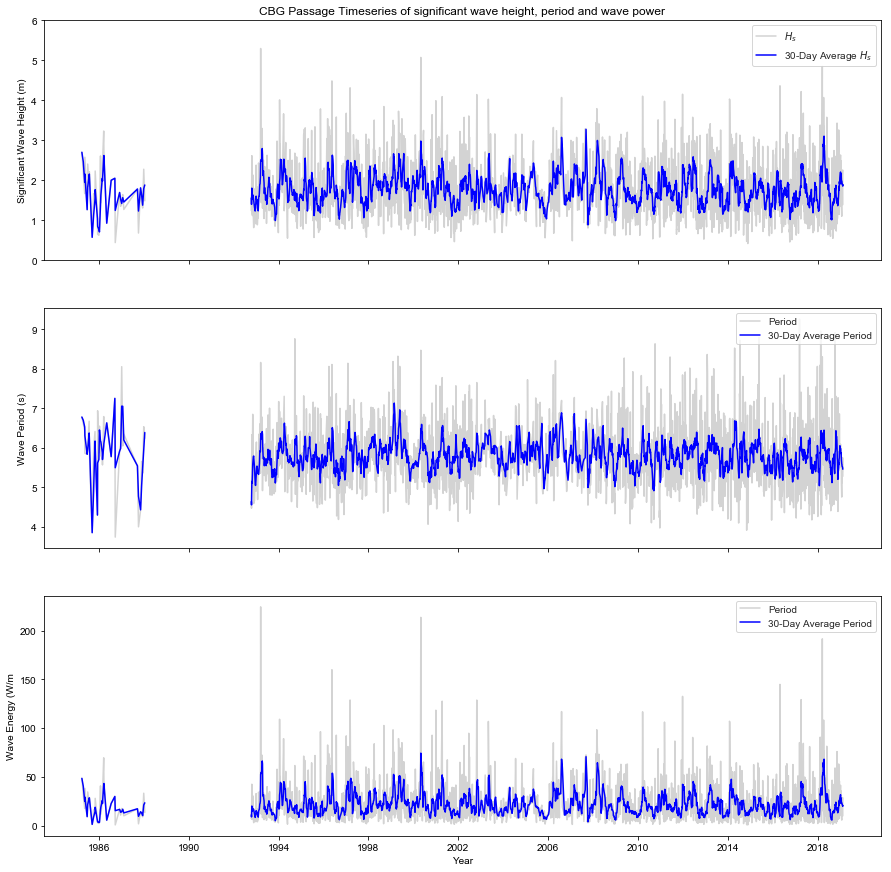

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex = True,figsize = (15,15))    


sns.set_style("white")
#fig.title("Innisfail 30 Day Moving Average Significant Wave Height")


#HS
#Before date break
ax1.plot(x1,y1,color='lightgrey',label="$H_s$")
ax1.plot(x1,yy1,color='blue',label="30-Day Average $H_s$")

#After date break
ax1.plot(x2,y2,color='lightgrey', label='False')
ax1.plot(x2,yy2,color='blue')

ax1.legend(labels=["$H_s$","30-Day Average $H_s$"], loc='upper right')
ax1.set_ylabel("Significant Wave Height (m)")
ax1.set_ylim(0,6)


#Wave Period 
#Before date break
ax2.plot(x1, time1, color='lightgrey')
ax2.plot(x1,tt1,color='blue')

#After date break
ax2.plot(x2,time2, color='lightgrey')
ax2.plot(x2,tt2,color='blue')

ax2.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax2.set_ylabel("Wave Period (s)")


#Wave Power - Need to add data
#Before date break
ax3.plot(x1, p1,color='lightgrey')
ax3.plot(x1,pp1,color='blue')

#After date break
ax3.plot(x2,p2,color='lightgrey')
ax3.plot(x2,pp2,color='blue')

ax3.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax3.set_ylabel("Wave Energy (W/m") #Check if watts/metre is correct


#Formatting

plt.xlabel("Year")

#"years = pd.date_range(start='1985',end='2020', periods=10)
years = pd.date_range('2008','2015', freq='AS')
ax1.set_title('CBG Passage Timeseries of significant wave height, period and wave power')
plt.savefig("CBG_timeseries")



In [31]:
for k in range(len(days)):
    if df.power[k]>150:
        print wh[k], alltime[k], df.power[k]

5.296999931335449 1993-03-16 12:12:56.977430 224.459063274153
2.502647399902344 1996-05-05 12:30:59.374540 159.93164538645343
1.7996667623519895 2000-02-22 12:19:13.717448 213.7216126518507
0.9422499656677246 2016-12-06 18:45:55.359376 191.63691655687646


In [40]:
np.mean(df.period)

5.78947501570551

In [41]:
max(df.wh)

5.296999931335449

## Make month-year df

In [33]:
r = netCDF4.num2date(tt[days],u'days since 1985-01-01 00:00:00 UTC')

In [34]:
# use this to make year/month df

def getMeanH(month,year):
    valwh = []
    for k in range(len(days)):
        if r[k].year == year and r[k].month == month:
            valwh.append(wh[days[k]])

    return np.mean(valwh)


monthYear = []
for k in range(1,13):
    monthYear.append(getMeanH(k,1999))

print monthYear,
#     print alltime[k].year #,wh[days[k]]

[2.0412619369370595, 2.647133779525757, 1.670976894242423, 2.1860973040262857, 2.391450447695596, 1.9375430544217427, 2.4940047025680543, 1.7917014956474304, 1.8529943704605103, 1.46869757771492, 1.7247254593031747, 1.9490703145662944]


## Seasonal Kendall Test

In [35]:
nameCSV = 'CBGwh_my_no_nan_long.csv'
no_nan = pd.read_csv(str(nameCSV))
no_nan.set_index('Date')

,Wh
Date,
19931,1.423928
19932,1.826232
19933,2.618256
19934,2.237213
19935,1.548847
19936,1.499088
19937,1.965571
19938,1.602388
19939,1.522185


In [36]:
import pymannkendall as mk
seasonal = mk.seasonal_test(no_nan, period=12)
seasonal

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=11.057463725974527, Tau=0.2967680765108418, s=28796.0, var_s=6781458.666666667, slope=0.005897591762860579)